# Regression - GLMs


## Exercise 1: Counting Poissons

The `data/fish.csv` is a data set of camping trips taken by 250 groups of people.

- The campers may or may not have done some fishing during their trip.
- If a group did some fishing, they would have caught zero or mor fish.
- We want to estimate not only how many fish were caught (if there was fishing done by a camping group), but also the probability that the camping group caught any fish at all.

Here's info on the columns:

- **FISH_COUNT:** The number of fish that were caught. This will be our dependent variable y.
- **LIVE_BAIT:** A binary variable indicating whether live bait was used.
- **CAMPER:** Whether the fishing group used a camper van.
- **PERSONS:** Total number of people in the fishing group. Note that in some groups, none of them may have fished.
- **CHILDREN:** The number of children in the camping group.

Your task is to predict the number of fish caught (`FISH_COUNT`) by a camping group based on the values of `LIVE_BAIT`, `CAMPER`, `PERSONS` and `CHILDREN` variables.

Use what we learned on count variables and zero-inflated datasets to achieve the best model you can.

Interpret the models you used to give an analysis of each feature's effect on the predicted fish caught.

**N.B.** Please appreciate the effort we went through to find a fish dataset for a count problem pun. 😛

In [46]:
# exercise 1

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

fish = pd.read_csv("../data/fish.csv")
df = fish.copy()
df.describe()

,LIVE_BAIT,CAMPER,PERSONS,CHILDREN,FISH_COUNT
count,250.000000,250.000000,250.00000,250.000000,250.000000
mean,0.864000,0.588000,2.52800,0.684000,3.296000
std,0.343476,0.493182,1.11273,0.850315,11.635028
min,0.000000,0.000000,1.00000,0.000000,0.000000
25%,1.000000,0.000000,2.00000,0.000000,0.000000
50%,1.000000,1.000000,2.00000,0.000000,0.000000
75%,1.000000,1.000000,4.00000,1.000000,2.000000
max,1.000000,1.000000,4.00000,3.000000,149.000000


In [47]:
y = df['FISH_COUNT']
X = df.drop('FISH_COUNT',axis=1)
X = sm.add_constant(X)
est = sm.ZeroInflatedPoisson(y,X).fit()
est.summary()

Optimization terminated successfully.
         Current function value: 2.943385
         Iterations: 20
         Function evaluations: 22
         Gradient evaluations: 22


C:\Users\Simona\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                     ZeroInflatedPoisson Regression Results                    
===============================================================================
Dep. Variable:              FISH_COUNT   No. Observations:                  250
Model:             ZeroInflatedPoisson   Df Residuals:                      245
Method:                            MLE   Df Model:                            4
Date:                 Mon, 19 Dec 2022   Pseudo R-squ.:                  0.3471
Time:                         10:19:48   Log-Likelihood:                -735.85
converged:                        True   LL-Null:                       -1127.0
Covariance Type:             nonrobust   LLR p-value:                5.101e-168
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
inflate_const    -0.4805      0.177     -2.720      0.007      -0.827      -0.134
const            -2.5327      0.278     -9.099      0.000      -3.078      -1.987
LIVE_BAIT         1.7086      0.242      7.073      0.000       1.235       2.182
CAMPER            0.6745      0.094      7.191      0.000       0.491       0.858
PERSONS           0.8752      0.043     20.447      0.000       0.791       0.959
CHILDREN         -1.3957      0.090    -15.582      0.000      -1.571      -1.220
=================================================================================
"""

In [48]:
def reg_plot_on_ax(feature, ax):

    X = df.drop('FISH_COUNT',axis=1)
    X = sm.add_constant(X)
    features = list(X.columns)
    
    means_list = []
    input_df = {'const':1.0}
    for i in range(len(features)):
        means_list.append(X[features[i]].mean())
    for j in range(len(features)):
        input_df[features[j]]=means_list[j]
    input_df = pd.DataFrame(input_df,index = range(250))

    min_feature = df[feature].min()
    max_feature = df[feature].max()
    ticks = (max_feature-min_feature)/250
    n=min_feature
    for i in range(len(input_df[feature])):
        input_df[feature].iloc[i] = n
        n += ticks
        
    features = list(df.columns)
    for i in range(len(features)):
        if features[i]==feature:
            index = i+1
    
    y = df['FISH_COUNT']
    X = np.squeeze(np.asarray(X))
    y = np.squeeze(np.asarray(y))
    est = sm.ZeroInflatedPoisson(y,X).fit()
    
    Xfit = input_df
    yfit = est.predict(Xfit)
    Xfit = np.squeeze(np.asarray(Xfit))
    
    title_name = {'LIVE_BAIT':'Live Bait','CAMPER':feature.capitalize(),'PERSONS':feature.capitalize()
                  ,'CHILDREN':feature.capitalize()}
    
    ax.scatter(X[:,index],y, color='blue', alpha=0.3, s=35 , marker='<')
    ax.plot(Xfit[:,index],yfit, c='magenta')
    ax.set_title(f'Fish Count by {title_name[feature]}')
    ax.set_ylabel('Fish Count')
    ax.set_xlabel('Persons')
#     ax.set_xticks([1.0,2.0,3.0,4.0])
#     fig.show()

C:\Users\Simona\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Simona\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Simona\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Simona\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 2.943385
         Iterations: 20
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 2.943385
         Iterations: 20
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 2.943385
         Iterations: 20
         Function evaluations: 22
         Gradient evaluations: 22
Optimization terminated successfully.
         Current function value: 2.943385
         Iterations: 20
         Function evaluations: 22
         Gradient evaluations: 22


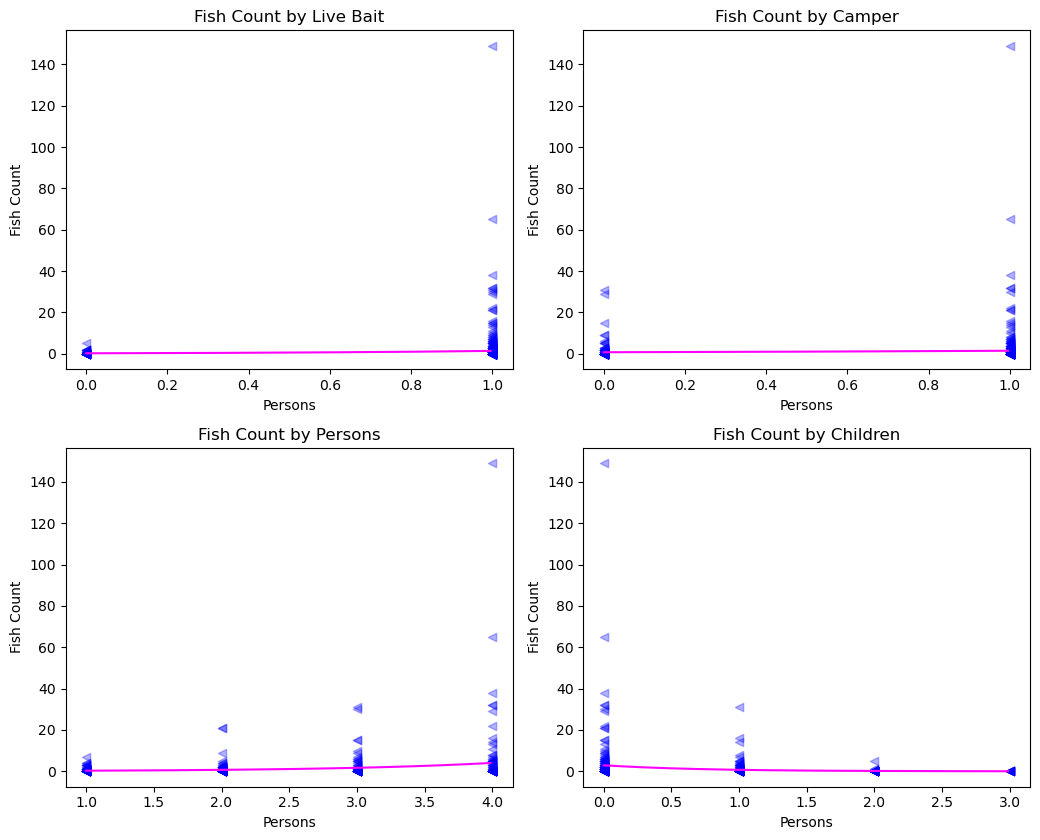

In [49]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(10.5,8.5))
reg_plot_on_ax('LIVE_BAIT',ax1)
reg_plot_on_ax('CAMPER',ax2)
reg_plot_on_ax('PERSONS',ax3)
reg_plot_on_ax('CHILDREN',ax4)
fig.tight_layout()

In [64]:
print("LIVE_BAIT 1.7086",
      "CAMPER    0.6745",
      "PERSONS   0.8752",
      "CHILDREN -1.3957",
      sep="\n")
print("\nThe model gives us some information on the relationship between each feature and the number of fish caught.",
      "\nIn the case of whether live bait was used, it seems that when live bait is used (1) as opposed to not used (0),",
      "\nthere are a higher number of fish caught with that live bait, the model's coefficient being positive (1.7086).",
      "\nThe relationship between whether the fishing group used a camper van and the fish count is a positive one, the",
      "\nthe coefficient between those two variables being positive and of 0.6745. As for the number of people in the,",
      "\nfishing group, the fish count seems to increase with the value of that feature, the coefficient being 0.8752 and",
      "\npositive. This shows that the higher the number of people in the group, the higher the fish count tends to be.",
      "\nHowever, the number of children in the camping group seems to have a negative relationship with the fish count", 
      "\nthe coefficient being -1.3957 and indicating that the number of fish caught decreases with the number of children.")

LIVE_BAIT 1.7086
CAMPER    0.6745
PERSONS   0.8752
CHILDREN -1.3957

The model gives us some information on the relationship between each feature and the number of fish caught. 
In the case of whether live bait was used, it seems that when live bait is used (1) as opposed to not used (0), 
there are a higher number of fish caught with that live bait, the model's coefficient being positive (1.7086). 
The relationship between whether the fishing group used a camper van and the fish count is a positive one, the 
the coefficient between those two variables being positive and of 0.6745. As for the number of people in the, 
fishing group, the fish count seems to increase with the value of that feature, the coefficient being 0.8752 and 
positive. This shows that the higher the number of people in the group, the higher the fish count tends to be. 
However, the number of children in the camping group seems to have a negative relationship with the fish count 
the coefficient being -1.3957 and in